### Recently you entered in the mobile manufacturing market. Build a machine learning model that would help you to know the estimated price for your manufactured mobile phones on the basis of various key features and specifications.
- Dataset - https://www.kaggle.com/datasets/manishkc06/mobile-price-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('mobile_price_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [3]:
df

mobile_name mobile_price     mobile_color  \
0      Realme Narzo 10A (So White, 32 GB)       ₹8,999         So White   
1       Realme Narzo 10A (So Blue, 32 GB)       ₹8,999          So Blue   
2       Realme Narzo 10A (So Blue, 64 GB)       ₹9,999          So Blue   
3      Realme Narzo 10A (So White, 64 GB)       ₹9,999         So White   
4    Realme Narzo 10 (That Green, 128 GB)      ₹11,999       That Green   
..                                    ...          ...              ...   
454               OPPO A83 (Black, 32 GB)      ₹13,490            Black   
455                 OPPO A83 (Red, 16 GB)       ₹9,490              Red   
456                  OPPO F7 (Red, 64 GB)      ₹22,990              Red   
457       OPPO F11 (Marble Green, 128 GB)      ₹13,990     Marble Green   
458    OPPO F11 (Fluorite Purple, 128 GB)      ₹13,990  Fluorite Purple   

     dual_sim             disp_size          resolution                  os  \
0    Dual Sim  16.56 cm (6.52 inch)   1600 x 720 Pixels          Android 10   
1    Dual Sim  16.56 cm (6.52 inch)   1600 x 720 Pixels          Android 10   
2    Dual Sim  16.56 cm (6.52 inch)   1600 x 720 Pixels          Android 10   
3    Dual Sim  16.56 cm (6.52 inch)   1600 x 720 Pixels          Android 10   
4    Dual Sim   16.51 cm (6.5 inch)   1600 x 720 Pixels          Android 10   
..        ...                   ...                 ...                 ...   
454  Dual Sim   14.48 cm (5.7 inch)   1440 x 720 Pixels  Android Nougat 7.1   
455  Dual Sim   14.48 cm (5.7 inch)   1440 x 720 Pixels  Android Nougat 7.1   
456  Dual Sim  15.82 cm (6.23 inch)  2280 x 1080 Pixels  Android Oreo 8.1.0   
457  Dual Sim  16.59 cm (6.53 inch)  1080 x 2340 pixels     Android Pie 9.0   
458  Dual Sim  16.59 cm (6.53 inch)  1080 x 2340 pixels     Android Pie 9.0   

     num_cores mp_speed int_memory   ram                   p_cam  \
0    Octa Core    2 GHz      32 GB  3 GB        12MP + 2MP + 2MP   
1    Octa Core    2 GHz      32 GB  3 GB        12MP + 2MP + 2MP   
2    Octa Core    2 GHz      64 GB  4 GB        12MP + 2MP + 2MP   
3    Octa Core    2 GHz      64 GB  4 GB        12MP + 2MP + 2MP   
4    Octa Core    2 GHz     128 GB  4 GB  48MP + 8MP + 2MP + 2MP   
..         ...      ...        ...   ...                     ...   
454  Octa Core  2.5 GHz      32 GB  3 GB        13MP Rear Camera   
455  Octa Core  2.5 GHz      16 GB  2 GB        13MP Rear Camera   
456  Octa Core    2 GHz      64 GB  4 GB        16MP Rear Camera   
457  Octa Core  2.1 GHz     128 GB  4 GB              48MP + 5MP   
458  Octa Core  2.1 GHz     128 GB  4 GB              48MP + 5MP   

                 f_cam               network bluetooth battery_power  \
0     5MP Front Camera  4G VOLTE, 4G, 3G, 2G       Yes      5000 mAh   
1     5MP Front Camera  4G VOLTE, 4G, 3G, 2G       Yes      5000 mAh   
2     5MP Front Camera  4G VOLTE, 4G, 3G, 2G       Yes      5000 mAh   
3     5MP Front Camera  4G VOLTE, 4G, 3G, 2G       Yes      5000 mAh   
4    16MP Front Camera  4G VOLTE, 4G, 3G, 2G       Yes      5000 mAh   
..                 ...                   ...       ...           ...   
454   8MP Front Camera      3G, 4G VOLTE, 2G       Yes      3180 mAh   
455   8MP Front Camera  3G, 4G VOLTE, 4G, 2G       Yes      3180 mAh   
456  25MP Front Camera            3G, 4G, 2G       Yes      3400 mAh   
457  16MP Front Camera  3G, 4G VOLTE, 4G, 2G       Yes      4020 mAh   
458  16MP Front Camera  3G, 4G VOLTE, 4G, 2G       Yes      4020 mAh   

    mob_width mob_height mob_depth mob_weight  
0       75 mm   164.4 mm   8.95 mm      195 g  
1       75 mm   164.4 mm   8.95 mm      195 g  
2       75 mm   164.4 mm   8.95 mm      195 g  
3       75 mm   164.4 mm   8.95 mm      195 g  
4     75.4 mm   164.4 mm      9 mm      199 g  
..        ...        ...       ...        ...  
454   73.1 mm   150.5 mm    7.7 mm      143 g  
455   73.1 mm   150.5 mm    7.7 mm      143 g  
456   75.3 mm     156 mm    7.8 mm      158 g  
457   76.1 mm     

In [4]:
# check for the unique values in each column
for var in df.columns:
    print(f"{df[var].name} : {df[var].unique()}")
    print("/n")

mobile_name : ['Realme Narzo 10A (So White, 32 GB)' 'Realme Narzo 10A (So Blue, 32 GB)'
 'Realme Narzo 10A (So Blue, 64 GB)' 'Realme Narzo 10A (So White, 64 GB)'
 'Realme Narzo 10 (That Green, 128 GB)'
 'Realme Narzo 10 (That White, 128 GB)'
 'Realme 5 Pro (Crystal Green, 64 GB)'
 'Realme 5 Pro (Crystal Green, 128 GB)'
 'Realme 5 Pro (Sparkling Blue, 128 GB)'
 'Realme 5 Pro (Sparkling Blue, 64 GB)'
 'Realme X2 Pro (Lunar White, 256 GB)'
 'Realme X2 Pro (Neptune Blue, 256 GB)'
 'Realme X2 Pro (Neptune Blue, 128 GB)'
 'Realme X2 Pro (Lunar White, 128 GB)' 'Realme 2 Pro (Black Sea, 128 GB)'
 'Realme XT (Pearl Blue, 64 GB)' 'Realme XT (Pearl White, 64 GB)'
 'Realme X50 Pro (Rust Red, 128 GB)' 'Realme X50 Pro (Moss Green, 128 GB)'
 'Realme X50 Pro (Moss Green, 256 GB)' 'Realme C3 (Frozen Blue, 32 GB)'
 'Realme 6 (Comet White, 128 GB)'
 'Realme 6 Pro (Lightning Orange, 128 GB)'
 'Realme 6 Pro (Lightning Blue, 128 GB)'
 'Realme C2 (Diamond Black, 32 GB)' 'Realme C2 (Diamond Blue, 32 GB)'
 'Re

In [5]:
# since bluetooth has single value it can be dropped
df.drop(['bluetooth'],axis=1,inplace=True)

In [6]:
df.isna().sum()

mobile_name      0
mobile_price     0
mobile_color     0
dual_sim         0
disp_size        0
resolution       0
os               0
num_cores        0
mp_speed         0
int_memory       0
ram              0
p_cam            0
f_cam            0
network          0
battery_power    0
mob_width        0
mob_height       0
mob_depth        0
mob_weight       0
dtype: int64

In [7]:
df['os'].value_counts()

os
Android Pie 9                126
Android Oreo 8.1              96
Android Pie 9.0               82
Android 10                    68
Android Pie 10                16
Android Nougat 7.1.2          14
Android Oreo 8.1.0            13
Android Nougat 7.1            12
Android Oreo 8                 7
Android Nougat 7               7
Android Oreo 8.0               6
Android Lollipop 5.1           3
Android Marshmallow 6          3
Android Marshmallow 6.0.1      2
Android Lollipop 5.4.1         1
Android KitKat 4.4.2           1
Android Nougat 7.1.1           1
Android Lollipop 5.1.1         1
Name: count, dtype: int64

In [8]:
df['num_cores'].value_counts()

num_cores
Octa Core      444
Quad Core       14
Single Core      1
Name: count, dtype: int64

In [9]:
def remove_mobile_description(text):
    return text.split(" (")[0]

In [10]:
df['mobile_name'] = df['mobile_name'].apply(remove_mobile_description)
df

mobile_name mobile_price     mobile_color  dual_sim  \
0    Realme Narzo 10A       ₹8,999         So White  Dual Sim   
1    Realme Narzo 10A       ₹8,999          So Blue  Dual Sim   
2    Realme Narzo 10A       ₹9,999          So Blue  Dual Sim   
3    Realme Narzo 10A       ₹9,999         So White  Dual Sim   
4     Realme Narzo 10      ₹11,999       That Green  Dual Sim   
..                ...          ...              ...       ...   
454          OPPO A83      ₹13,490            Black  Dual Sim   
455          OPPO A83       ₹9,490              Red  Dual Sim   
456           OPPO F7      ₹22,990              Red  Dual Sim   
457          OPPO F11      ₹13,990     Marble Green  Dual Sim   
458          OPPO F11      ₹13,990  Fluorite Purple  Dual Sim   

                disp_size          resolution                  os  num_cores  \
0    16.56 cm (6.52 inch)   1600 x 720 Pixels          Android 10  Octa Core   
1    16.56 cm (6.52 inch)   1600 x 720 Pixels          Android 10  Octa Core   
2    16.56 cm (6.52 inch)   1600 x 720 Pixels          Android 10  Octa Core   
3    16.56 cm (6.52 inch)   1600 x 720 Pixels          Android 10  Octa Core   
4     16.51 cm (6.5 inch)   1600 x 720 Pixels          Android 10  Octa Core   
..                    ...                 ...                 ...        ...   
454   14.48 cm (5.7 inch)   1440 x 720 Pixels  Android Nougat 7.1  Octa Core   
455   14.48 cm (5.7 inch)   1440 x 720 Pixels  Android Nougat 7.1  Octa Core   
456  15.82 cm (6.23 inch)  2280 x 1080 Pixels  Android Oreo 8.1.0  Octa Core   
457  16.59 cm (6.53 inch)  1080 x 2340 pixels     Android Pie 9.0  Octa Core   
458  16.59 cm (6.53 inch)  1080 x 2340 pixels     Android Pie 9.0  Octa Core   

    mp_speed int_memory   ram                   p_cam              f_cam  \
0      2 GHz      32 GB  3 GB        12MP + 2MP + 2MP   5MP Front Camera   
1      2 GHz      32 GB  3 GB        12MP + 2MP + 2MP   5MP Front Camera   
2      2 GHz      64 GB  4 GB        12MP + 2MP + 2MP   5MP Front Camera   
3      2 GHz      64 GB  4 GB        12MP + 2MP + 2MP   5MP Front Camera   
4      2 GHz     128 GB  4 GB  48MP + 8MP + 2MP + 2MP  16MP Front Camera   
..       ...        ...   ...                     ...                ...   
454  2.5 GHz      32 GB  3 GB        13MP Rear Camera   8MP Front Camera   
455  2.5 GHz      16 GB  2 GB        13MP Rear Camera   8MP Front Camera   
456    2 GHz      64 GB  4 GB        16MP Rear Camera  25MP Front Camera   
457  2.1 GHz     128 GB  4 GB              48MP + 5MP  16MP Front Camera   
458  2.1 GHz     128 GB  4 GB              48MP + 5MP  16MP Front Camera   

                  network battery_power mob_width mob_height mob_depth  \
0    4G VOLTE, 4G, 3G, 2G      5000 mAh     75 mm   164.4 mm   8.95 mm   
1    4G VOLTE, 4G, 3G, 2G      5000 mAh     75 mm   164.4 mm   8.95 mm   
2    4G VOLTE, 4G, 3G, 2G      5000 mAh     75 mm   164.4 mm   8.95 mm   
3    4G VOLTE, 4G, 3G, 2G      5000 mAh     75 mm   164.4 mm   8.95 mm   
4    4G VOLTE, 4G, 3G, 2G      5000 mAh   75.4 mm   164.4 mm      9 mm   
..                    ...           ...       ...        ...       ...   
454      3G, 4G VOLTE, 2G      3180 mAh   73.1 mm   150.5 mm    7.7 mm   
455  3G, 4G VOLTE, 4G, 2G      3180 mAh   73.1 mm   150.5 mm    7.7 mm   
456            3G, 4G, 2G      3400 mAh   75.3 mm     156 mm    7.8 mm   
457  3G, 4G VOLTE, 4G, 2G      4020 mAh   76.1 mm     162 mm    8.3 mm   
458  3G, 4G VOLTE, 4G, 2G      4020 mAh   76.1 mm     162 mm    8.3 mm   

    mob_weight  
0        195 g  
1        195 g  
2        195 g  
3        195 g  
4        199 g  
..         ...  
454      143 g  
455      143 g  
456      158 g  
457      188 g  
458      188 g  

[459 rows x 19 columns]

In [11]:
df.rename(columns={'mobile_price' : 'mobile_price(₹)'}, inplace=True)


In [12]:
## Remove the rupee symbol and commas from the values in the 'mobile_price(₹)' column
df['mobile_price(₹)'] = df['mobile_price(₹)'].str.replace('₹','').str.replace(',','')
# Clean the resolution column to remove any problematic characters
df['resolution'] = df['resolution'].str.replace('[^\w\s]', '', regex=True)
df

mobile_name mobile_price(₹)     mobile_color  dual_sim  \
0    Realme Narzo 10A            8999         So White  Dual Sim   
1    Realme Narzo 10A            8999          So Blue  Dual Sim   
2    Realme Narzo 10A            9999          So Blue  Dual Sim   
3    Realme Narzo 10A            9999         So White  Dual Sim   
4     Realme Narzo 10           11999       That Green  Dual Sim   
..                ...             ...              ...       ...   
454          OPPO A83           13490            Black  Dual Sim   
455          OPPO A83            9490              Red  Dual Sim   
456           OPPO F7           22990              Red  Dual Sim   
457          OPPO F11           13990     Marble Green  Dual Sim   
458          OPPO F11           13990  Fluorite Purple  Dual Sim   

                disp_size          resolution                  os  num_cores  \
0    16.56 cm (6.52 inch)   1600 x 720 Pixels          Android 10  Octa Core   
1    16.56 cm (6.52 inch)   1600 x 720 Pixels          Android 10  Octa Core   
2    16.56 cm (6.52 inch)   1600 x 720 Pixels          Android 10  Octa Core   
3    16.56 cm (6.52 inch)   1600 x 720 Pixels          Android 10  Octa Core   
4     16.51 cm (6.5 inch)   1600 x 720 Pixels          Android 10  Octa Core   
..                    ...                 ...                 ...        ...   
454   14.48 cm (5.7 inch)   1440 x 720 Pixels  Android Nougat 7.1  Octa Core   
455   14.48 cm (5.7 inch)   1440 x 720 Pixels  Android Nougat 7.1  Octa Core   
456  15.82 cm (6.23 inch)  2280 x 1080 Pixels  Android Oreo 8.1.0  Octa Core   
457  16.59 cm (6.53 inch)  1080 x 2340 pixels     Android Pie 9.0  Octa Core   
458  16.59 cm (6.53 inch)  1080 x 2340 pixels     Android Pie 9.0  Octa Core   

    mp_speed int_memory   ram                   p_cam              f_cam  \
0      2 GHz      32 GB  3 GB        12MP + 2MP + 2MP   5MP Front Camera   
1      2 GHz      32 GB  3 GB        12MP + 2MP + 2MP   5MP Front Camera   
2      2 GHz      64 GB  4 GB        12MP + 2MP + 2MP   5MP Front Camera   
3      2 GHz      64 GB  4 GB        12MP + 2MP + 2MP   5MP Front Camera   
4      2 GHz     128 GB  4 GB  48MP + 8MP + 2MP + 2MP  16MP Front Camera   
..       ...        ...   ...                     ...                ...   
454  2.5 GHz      32 GB  3 GB        13MP Rear Camera   8MP Front Camera   
455  2.5 GHz      16 GB  2 GB        13MP Rear Camera   8MP Front Camera   
456    2 GHz      64 GB  4 GB        16MP Rear Camera  25MP Front Camera   
457  2.1 GHz     128 GB  4 GB              48MP + 5MP  16MP Front Camera   
458  2.1 GHz     128 GB  4 GB              48MP + 5MP  16MP Front Camera   

                  network battery_power mob_width mob_height mob_depth  \
0    4G VOLTE, 4G, 3G, 2G      5000 mAh     75 mm   164.4 mm   8.95 mm   
1    4G VOLTE, 4G, 3G, 2G      5000 mAh     75 mm   164.4 mm   8.95 mm   
2    4G VOLTE, 4G, 3G, 2G      5000 mAh     75 mm   164.4 mm   8.95 mm   
3    4G VOLTE, 4G, 3G, 2G      5000 mAh     75 mm   164.4 mm   8.95 mm   
4    4G VOLTE, 4G, 3G, 2G      5000 mAh   75.4 mm   164.4 mm      9 mm   
..                    ...           ...       ...        ...       ...   
454      3G, 4G VOLTE, 2G      3180 mAh   73.1 mm   150.5 mm    7.7 mm   
455  3G, 4G VOLTE, 4G, 2G      3180 mAh   73.1 mm   150.5 mm    7.7 mm   
456            3G, 4G, 2G      3400 mAh   75.3 mm     156 mm    7.8 mm   
457  3G, 4G VOLTE, 4G, 2G      4020 mAh   76.1 mm     162 mm    8.3 mm   
458  3G, 4G VOLTE, 4G, 2G      4020 mAh   76.1 mm     162 mm    8.3 mm   

    mob_weight  
0        195 g  
1        195 g  
2        195 g  
3        195 g  
4        199 g  
..         ...  
454      143 g  
455      143 g  
456      158 g  
457      188 g  
458      188 g  

[459 rows x 19 columns]

In [13]:
df.rename(columns={'battery_power' : 'battery_power(mAh)', 'mob_width' : 'mob_width(mm)', 'mob_height' : 'mob_height(mm)','mob_depth' : 'mob_depth(mm)'},inplace=True)
df['battery_power(mAh)'] = df['battery_power(mAh)'].str.replace('mAh','')
df['mob_width(mm)'] = df['mob_width(mm)'].str.replace('mm','')
df['mob_height(mm)'] = df['mob_height(mm)'].str.replace('mm','')
df['mob_depth(mm)'] = df['mob_depth(mm)'].str.replace('mm','')
df.head()

mobile_name mobile_price(₹) mobile_color  dual_sim  \
0  Realme Narzo 10A            8999     So White  Dual Sim   
1  Realme Narzo 10A            8999      So Blue  Dual Sim   
2  Realme Narzo 10A            9999      So Blue  Dual Sim   
3  Realme Narzo 10A            9999     So White  Dual Sim   
4   Realme Narzo 10           11999   That Green  Dual Sim   

              disp_size         resolution          os  num_cores mp_speed  \
0  16.56 cm (6.52 inch)  1600 x 720 Pixels  Android 10  Octa Core    2 GHz   
1  16.56 cm (6.52 inch)  1600 x 720 Pixels  Android 10  Octa Core    2 GHz   
2  16.56 cm (6.52 inch)  1600 x 720 Pixels  Android 10  Octa Core    2 GHz   
3  16.56 cm (6.52 inch)  1600 x 720 Pixels  Android 10  Octa Core    2 GHz   
4   16.51 cm (6.5 inch)  1600 x 720 Pixels  Android 10  Octa Core    2 GHz   

  int_memory   ram                   p_cam              f_cam  \
0      32 GB  3 GB        12MP + 2MP + 2MP   5MP Front Camera   
1      32 GB  3 GB        12MP + 2MP + 2MP   5MP Front Camera   
2      64 GB  4 GB        12MP + 2MP + 2MP   5MP Front Camera   
3      64 GB  4 GB        12MP + 2MP + 2MP   5MP Front Camera   
4     128 GB  4 GB  48MP + 8MP + 2MP + 2MP  16MP Front Camera   

                network battery_power(mAh) mob_width(mm) mob_height(mm)  \
0  4G VOLTE, 4G, 3G, 2G              5000            75          164.4    
1  4G VOLTE, 4G, 3G, 2G              5000            75          164.4    
2  4G VOLTE, 4G, 3G, 2G              5000            75          164.4    
3  4G VOLTE, 4G, 3G, 2G              5000            75          164.4    
4  4G VOLTE, 4G, 3G, 2G              5000          75.4          164.4    

  mob_depth(mm) mob_weight  
0         8.95       195 g  
1         8.95       195 g  
2         8.95       195 g  
3         8.95       195 g  
4            9       199 g

In [14]:
df.rename(columns={'mp_speed':'mp_speed(GHz)','int_memory':'int_memory(GB)','ram':'RAM(GB)','mob_weight':'mob_weight(g)'},inplace=True)
df['int_memory(GB)'] = df['int_memory(GB)'].str.replace('GB','')
df['mob_weight(g)'] = df['mob_weight(g)'].str.replace('g','')
df['mp_speed(GHz)'] = df['mp_speed(GHz)'].str.replace('GHz','')
df['RAM(GB)'] = df['RAM(GB)'].str.replace('GB','')
df.head()

mobile_name mobile_price(₹) mobile_color  dual_sim  \
0  Realme Narzo 10A            8999     So White  Dual Sim   
1  Realme Narzo 10A            8999      So Blue  Dual Sim   
2  Realme Narzo 10A            9999      So Blue  Dual Sim   
3  Realme Narzo 10A            9999     So White  Dual Sim   
4   Realme Narzo 10           11999   That Green  Dual Sim   

              disp_size         resolution          os  num_cores  \
0  16.56 cm (6.52 inch)  1600 x 720 Pixels  Android 10  Octa Core   
1  16.56 cm (6.52 inch)  1600 x 720 Pixels  Android 10  Octa Core   
2  16.56 cm (6.52 inch)  1600 x 720 Pixels  Android 10  Octa Core   
3  16.56 cm (6.52 inch)  1600 x 720 Pixels  Android 10  Octa Core   
4   16.51 cm (6.5 inch)  1600 x 720 Pixels  Android 10  Octa Core   

  mp_speed(GHz) int_memory(GB) RAM(GB)                   p_cam  \
0            2             32       3         12MP + 2MP + 2MP   
1            2             32       3         12MP + 2MP + 2MP   
2            2             64       4         12MP + 2MP + 2MP   
3            2             64       4         12MP + 2MP + 2MP   
4            2            128       4   48MP + 8MP + 2MP + 2MP   

               f_cam               network battery_power(mAh) mob_width(mm)  \
0   5MP Front Camera  4G VOLTE, 4G, 3G, 2G              5000            75    
1   5MP Front Camera  4G VOLTE, 4G, 3G, 2G              5000            75    
2   5MP Front Camera  4G VOLTE, 4G, 3G, 2G              5000            75    
3   5MP Front Camera  4G VOLTE, 4G, 3G, 2G              5000            75    
4  16MP Front Camera  4G VOLTE, 4G, 3G, 2G              5000          75.4    

  mob_height(mm) mob_depth(mm) mob_weight(g)  
0         164.4          8.95           195   
1         164.4          8.95           195   
2         164.4          8.95           195   
3         164.4          8.95           195   
4         164.4             9           199

In [15]:
df['RAM(GB)'] = df['RAM(GB)'].astype('int32')
df['battery_power(mAh)'] = df['battery_power(mAh)'].astype('int32')
df['int_memory(GB)'] = df['int_memory(GB)'].astype('int32')
df['mob_width(mm)'] = df['mob_width(mm)'].astype('float32')
df['mob_height(mm)'] = df['mob_height(mm)'].astype('float32')
df['mob_depth(mm)'] = df['mob_depth(mm)'].astype('float32')
df['mob_weight(g)'] = df['mob_weight(g)'].astype('float32')
df['mobile_price(₹)'] = df['mobile_price(₹)'].astype('int32')
df['mp_speed(GHz)'] = df['mp_speed(GHz)'].astype('float32')
df.dtypes

mobile_name            object
mobile_price(₹)         int32
mobile_color           object
dual_sim               object
disp_size              object
resolution             object
os                     object
num_cores              object
mp_speed(GHz)         float32
int_memory(GB)          int32
RAM(GB)                 int32
p_cam                  object
f_cam                  object
network                object
battery_power(mAh)      int32
mob_width(mm)         float32
mob_height(mm)        float32
mob_depth(mm)         float32
mob_weight(g)         float32
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mobile_name         459 non-null    object 
 1   mobile_price(₹)     459 non-null    int32  
 2   mobile_color        459 non-null    object 
 3   dual_sim            459 non-null    object 
 4   disp_size           459 non-null    object 
 5   resolution          459 non-null    object 
 6   os                  459 non-null    object 
 7   num_cores           459 non-null    object 
 8   mp_speed(GHz)       459 non-null    float32
 9   int_memory(GB)      459 non-null    int32  
 10  RAM(GB)             459 non-null    int32  
 11  p_cam               459 non-null    object 
 12  f_cam               459 non-null    object 
 13  network             459 non-null    object 
 14  battery_power(mAh)  459 non-null    int32  
 15  mob_width(mm)       459 non-null    float32
 16  mob_heig

In [17]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
numerical = [var for var in df.columns if df[var].dtype != 'O']
print(f"categorical : {categorical}")
print(f"numerical : {numerical}")

categorical : ['mobile_name', 'mobile_color', 'dual_sim', 'disp_size', 'resolution', 'os', 'num_cores', 'p_cam', 'f_cam', 'network']
numerical : ['mobile_price(₹)', 'mp_speed(GHz)', 'int_memory(GB)', 'RAM(GB)', 'battery_power(mAh)', 'mob_width(mm)', 'mob_height(mm)', 'mob_depth(mm)', 'mob_weight(g)']


In [18]:
round(df.describe(),2)

mobile_price(₹)  mp_speed(GHz)  int_memory(GB)  RAM(GB)  \
count           459.00         459.00          459.00   459.00   
mean          16643.45           2.12           87.09     4.88   
std            8701.10           0.35           64.92     2.08   
min            6000.00           1.30            8.00     1.00   
25%           10999.00           2.00           32.00     4.00   
50%           14495.00           2.00           64.00     4.00   
75%           18990.00           2.30          128.00     6.00   
max           60990.00           2.96          512.00    12.00   

       battery_power(mAh)  mob_width(mm)  mob_height(mm)  mob_depth(mm)  \
count              459.00         459.00          459.00         459.00   
mean              4161.38          74.23          157.73          10.74   
std                615.90          13.11           12.22          12.83   
min               2000.00           8.35            7.38           7.30   
25%               4000.00          75.00          155.90           8.10   
50%               4030.00          75.35          158.70           8.50   
75%               4500.00          75.80          162.00           8.87   
max               6000.00         159.00          175.00          92.00   

       mob_weight(g)  
count         459.00  
mean          180.30  
std            17.88  
min           130.00  
25%           168.00  
50%           183.00  
75%           191.00  
max           215.00

<Axes: >

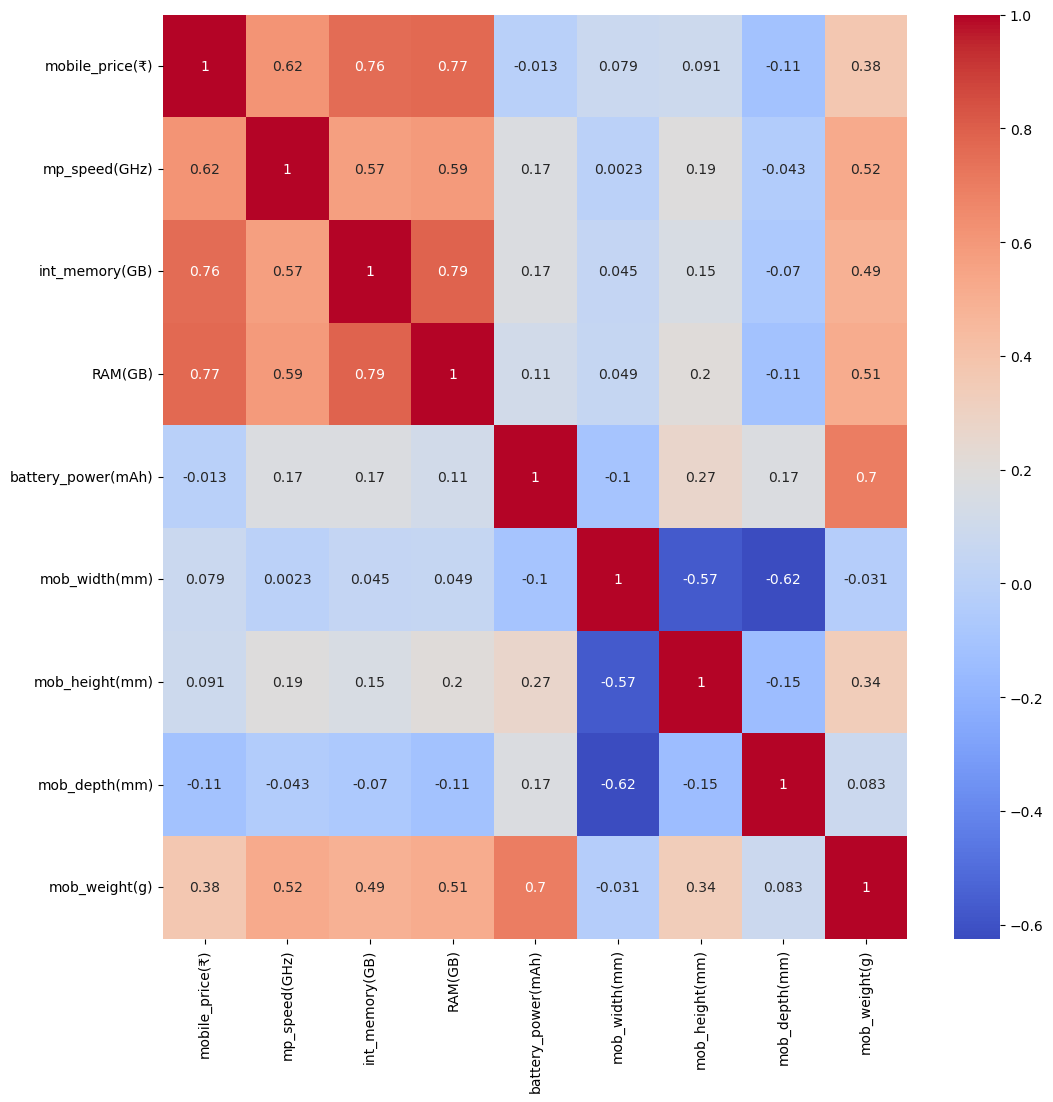

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df[numerical].corr(),annot=True,cmap='coolwarm')

In [20]:
# Estimate the correlation between the mobile price and other numerical features
df[numerical].corr()['mobile_price(₹)']

mobile_price(₹)       1.000000
mp_speed(GHz)         0.617347
int_memory(GB)        0.756921
RAM(GB)               0.767180
battery_power(mAh)   -0.012884
mob_width(mm)         0.079330
mob_height(mm)        0.090951
mob_depth(mm)        -0.112767
mob_weight(g)         0.375185
Name: mobile_price(₹), dtype: float64

/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x1800 with 0 Axes>

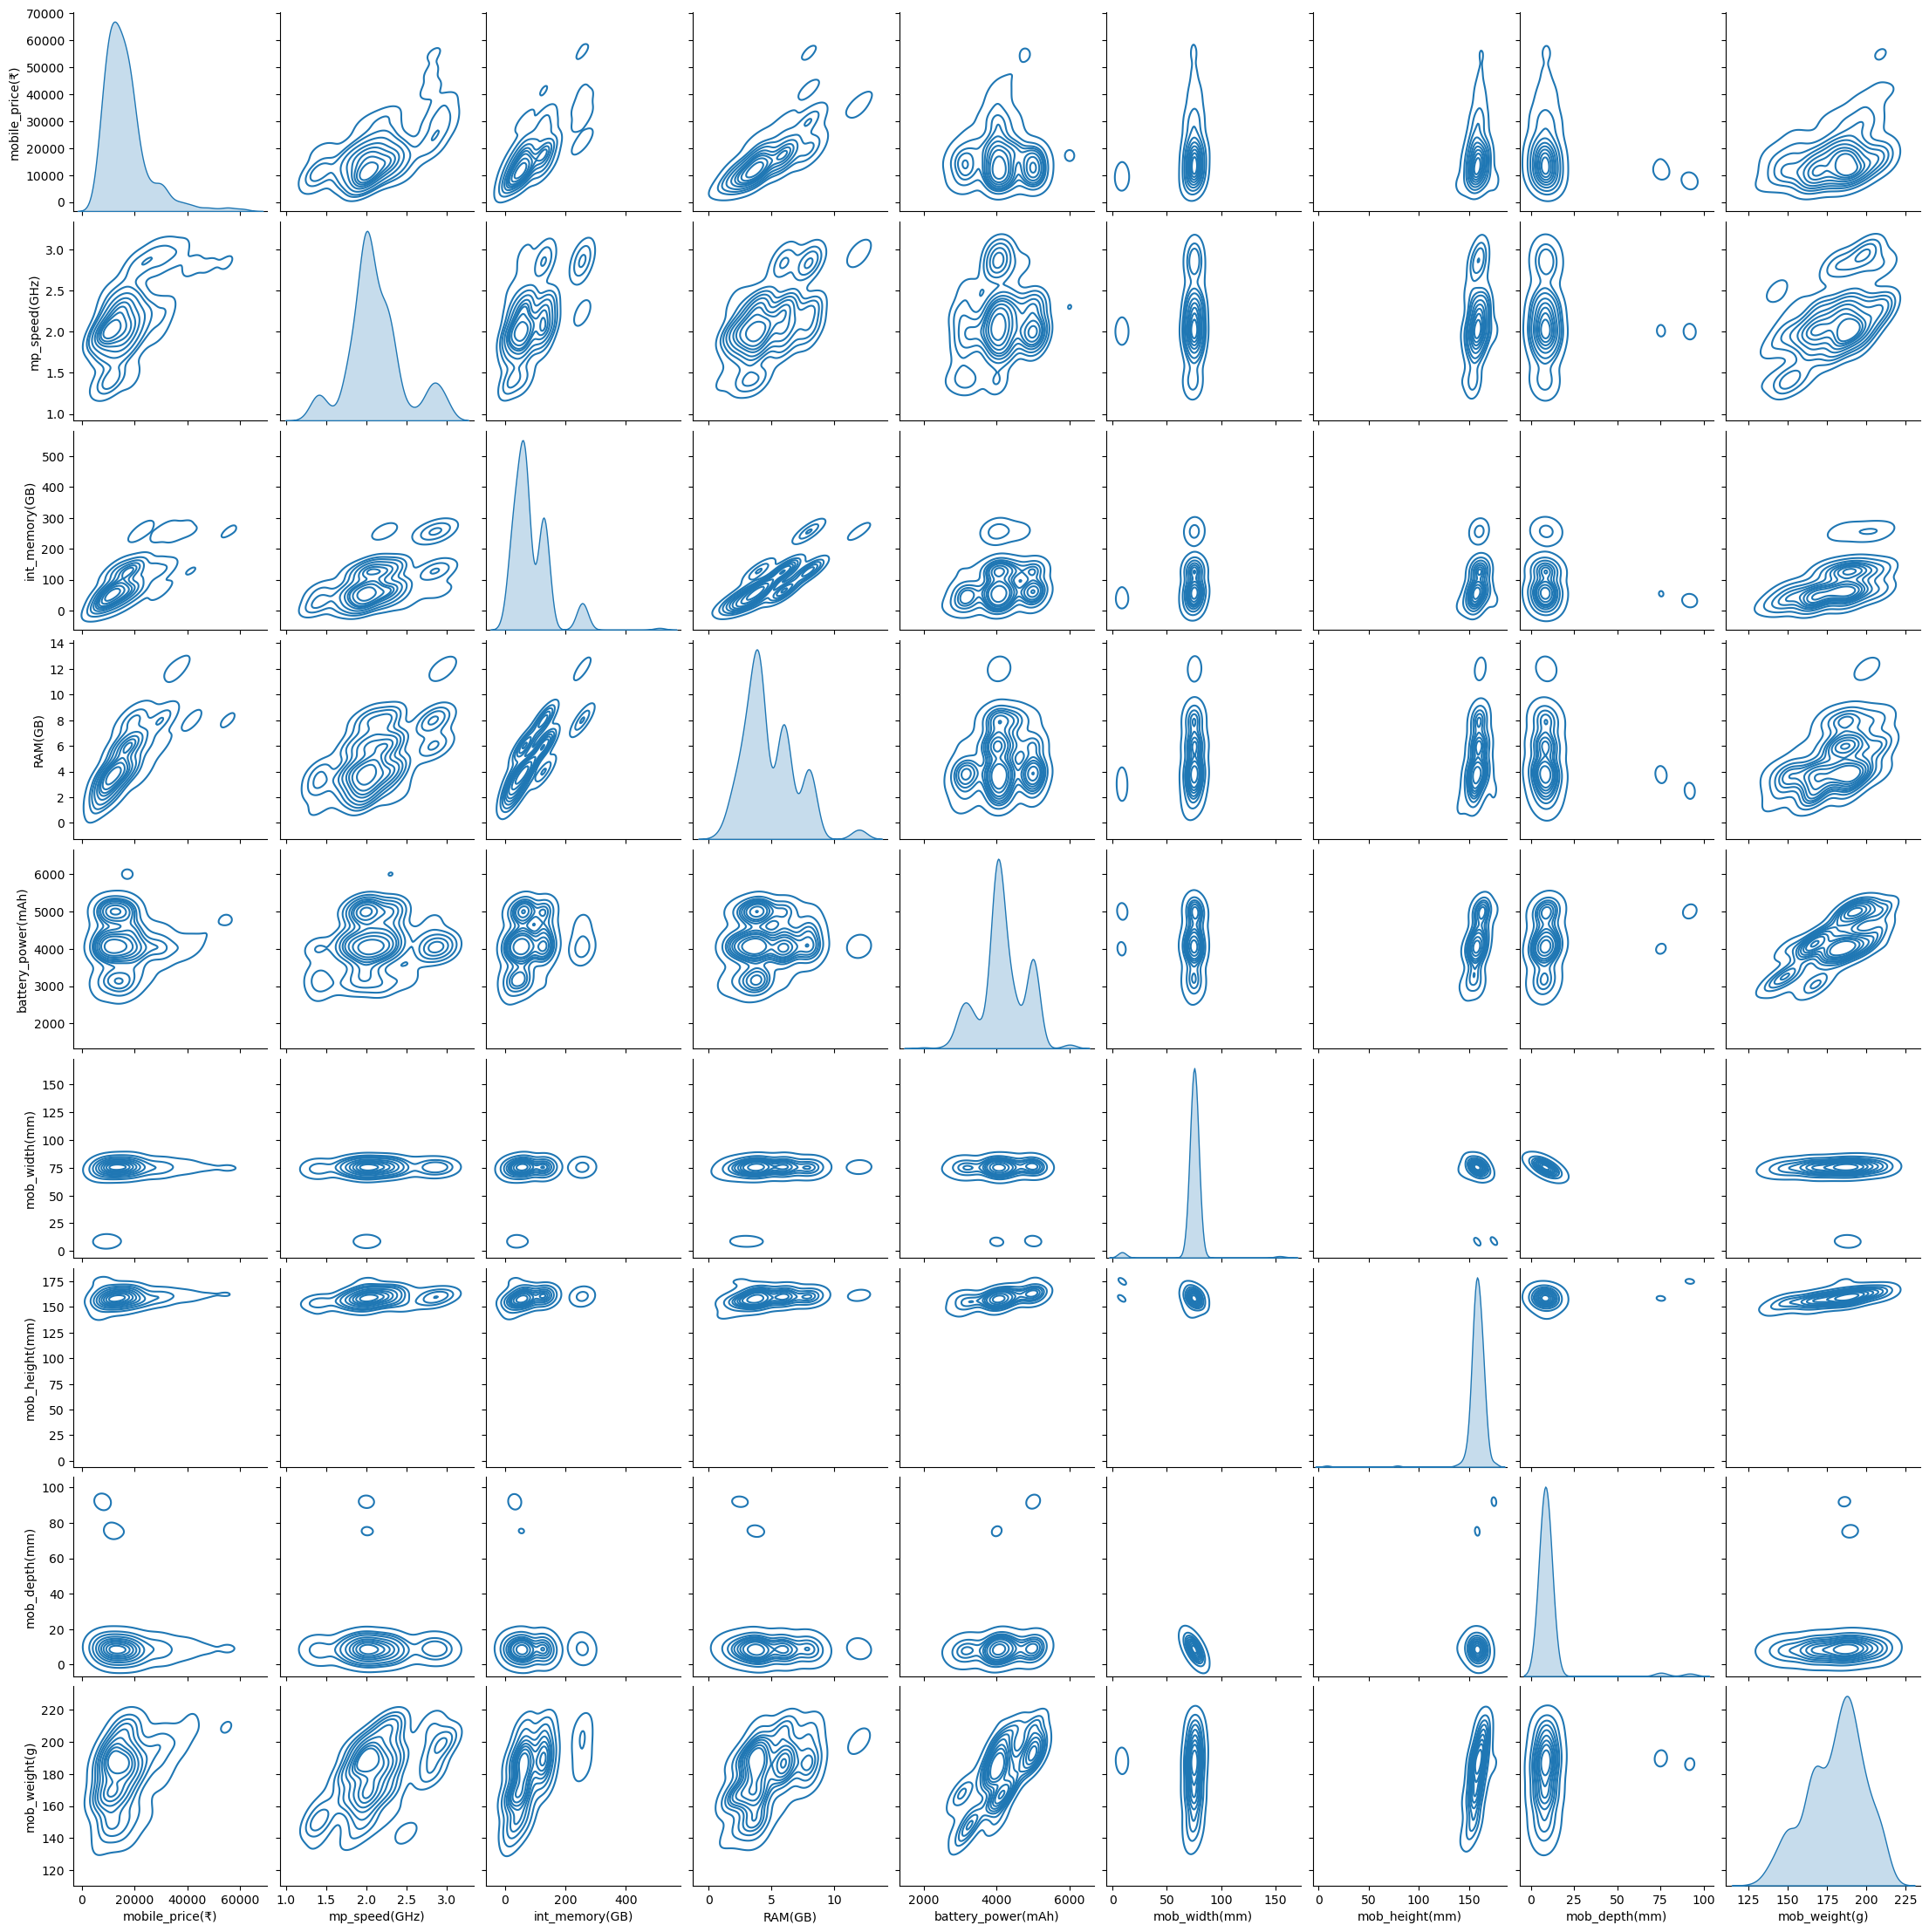

In [21]:
plt.figure(figsize=(18,18))
sns.pairplot(df[numerical],kind='kde')

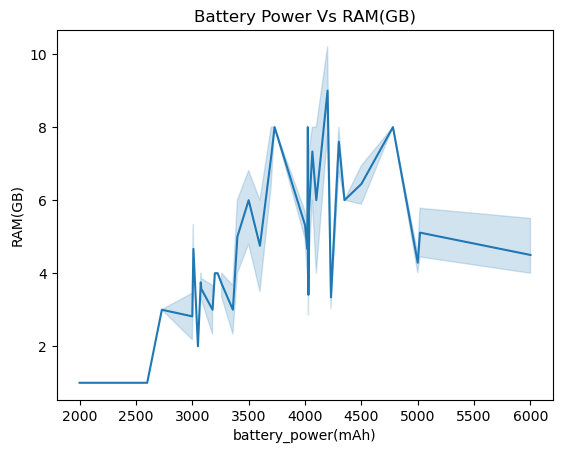

In [22]:
plt.title("Battery Power Vs RAM(GB)")
sns.lineplot(data=df,x='battery_power(mAh)',y='RAM(GB)')
plt.show()

In [23]:
px.pie(data_frame=df,names='RAM(GB)', title='Most preferred RAM(GB)', height=730, width=560)

In [24]:
px.scatter(data_frame=df,x='mobile_price(₹)',y='mobile_color', size='RAM(GB)')

In [25]:
# One-hot encoding for categorical variables
catgeorical_encoded = pd.get_dummies(df[categorical], drop_first=True)
catgeorical_encoded

mobile_name_Infinix Hot 9  mobile_name_Infinix Hot 9 Pro  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                          False   
4                        False                          False   
..                         ...                            ...   
454                      False                          False   
455                      False                          False   
456                      False                          False   
457                      False                          False   
458                      False                          False   

     mobile_name_Infinix Hot S3  mobile_name_Infinix Hot S3X  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   
..                          ...                          ...   
454                       False                        False   
455                       False                        False   
456                       False                        False   
457                       False                        False   
458                       False                        False   

     mobile_name_Infinix Note 5  mobile_name_Infinix Note 5 Stylus  \
0                         False                              False   
1                         False                              False   
2                         False                              False   
3                         False                              False   
4                         False                              False   
..                          ...                                ...   
454                       False                              False   
455                       False                              False   
456                       False                              False   
457                       False                              False   
458                       False                              False   

     mobile_name_Infinix S4  mobile_name_Infinix S5  \
0                     False                   False   
1                     False                   False   
2                     False                   False   
3                     False                   False   
4                     False                   False   
..                      ...                     ...   
454                   False                   False   
455                   False                   False   
456                   False                   False   
457                   False                   False   
458                   False                   False   

     mobile_name_Infinix S5 Lite  mobile_name_Infinix S5 Pro  ...  \
0                          False                       False  ...   
1                          False                       False  ...   
2                          False                       False  ...   
3                          False                       False  ...   
4                          False                       False  ...   
..                           ...                         ...  ...   
454                        False                       False  ...   
455                        False                       False  ...   
456                        False                       False  ...   
457                        False                       False  ...   
458                        False                       False  ...   

     network_4G VOLTE  network_4G VOLTE, 3G  network_4G VOLTE, 3G, 2G  \
0               False                 False        

In [26]:
#Standard scaling for numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_scaled = pd.DataFrame(scaler.fit_transform(df[numerical]), columns=numerical)
numerical_scaled

mobile_price(₹)  mp_speed(GHz)  int_memory(GB)   RAM(GB)  \
0          -0.879520      -0.337397       -0.849575 -0.902576   
1          -0.879520      -0.337397       -0.849575 -0.902576   
2          -0.764467      -0.337397       -0.356117 -0.421970   
3          -0.764467      -0.337397       -0.356117 -0.421970   
4          -0.534360      -0.337397        0.630798 -0.421970   
..               ...            ...             ...       ...   
454        -0.362815       1.088672       -0.849575 -0.902576   
455        -0.823029       1.088672       -1.096304 -1.383182   
456         0.730192      -0.337397       -0.356117 -0.421970   
457        -0.305288      -0.052184        0.630798 -0.421970   
458        -0.305288      -0.052184        0.630798 -0.421970   

     battery_power(mAh)  mob_width(mm)  mob_height(mm)  mob_depth(mm)  \
0              1.363092       0.058955        0.546276      -0.139627   
1              1.363092       0.058955        0.546276      -0.139627   
2              1.363092       0.058955        0.546276      -0.139627   
3              1.363092       0.058955        0.546276      -0.139627   
4              1.363092       0.089509        0.546276      -0.135725   
..                  ...            ...             ...            ...   
454           -1.595146      -0.086174       -0.592461      -0.237175   
455           -1.595146      -0.086174       -0.592461      -0.237175   
456           -1.237557       0.081871       -0.141881      -0.229371   
457           -0.229805       0.142977        0.349660      -0.190352   
458           -0.229805       0.142977        0.349660      -0.190352   

     mob_weight(g)  
0         0.822889  
1         0.822889  
2         0.822889  
3         0.822889  
4         1.046788  
..             ...  
454      -2.087796  
455      -2.087796  
456      -1.248175  
457       0.431066  
458       0.431066  

[459 rows x 9 columns]

In [27]:
df_final = pd.concat([catgeorical_encoded, numerical_scaled],axis=1)
df_final

mobile_name_Infinix Hot 9  mobile_name_Infinix Hot 9 Pro  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                          False   
4                        False                          False   
..                         ...                            ...   
454                      False                          False   
455                      False                          False   
456                      False                          False   
457                      False                          False   
458                      False                          False   

     mobile_name_Infinix Hot S3  mobile_name_Infinix Hot S3X  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   
..                          ...                          ...   
454                       False                        False   
455                       False                        False   
456                       False                        False   
457                       False                        False   
458                       False                        False   

     mobile_name_Infinix Note 5  mobile_name_Infinix Note 5 Stylus  \
0                         False                              False   
1                         False                              False   
2                         False                              False   
3                         False                              False   
4                         False                              False   
..                          ...                                ...   
454                       False                              False   
455                       False                              False   
456                       False                              False   
457                       False                              False   
458                       False                              False   

     mobile_name_Infinix S4  mobile_name_Infinix S5  \
0                     False                   False   
1                     False                   False   
2                     False                   False   
3                     False                   False   
4                     False                   False   
..                      ...                     ...   
454                   False                   False   
455                   False                   False   
456                   False                   False   
457                   False                   False   
458                   False                   False   

     mobile_name_Infinix S5 Lite  mobile_name_Infinix S5 Pro  ...  \
0                          False                       False  ...   
1                          False                       False  ...   
2                          False                       False  ...   
3                          False                       False  ...   
4                          False                       False  ...   
..                           ...                         ...  ...   
454                        False                       False  ...   
455                        False                       False  ...   
456                        False                       False  ...   
457                        False                       False  ...   
458                        False                       False  ...   

     network_5G, 4G VOLTE, 4G, 3G, 2G  mobile_price(₹)  mp_speed(GHz)  \
0                               False        -0.879

In [28]:
from sklearn.model_selection import train_test_split
X = df_final.drop(['mobile_price(₹)'],axis=1)
y = df_final['mobile_price(₹)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
X_train.shape, X_test.shape

((321, 478), (138, 478))

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# Model evaluation
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 11449147194.68776
R² Score: -1.3044920720952998e+20


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search for best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 0.33991366961321906
R² Score: 0.8850173201135083


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(120, 100))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances')
plt.show()


In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = [(-score) ** 0.5 for score in cv_scores]
print(f"Cross-validated RMSE scores: {rmse_scores}")
print(f"Average RMSE: {np.mean(rmse_scores)}")

Cross-validated RMSE scores: [0.5347910413177889, 0.6432684562551397, 0.46867238500046016, 0.6094143883203486, 0.8788822799605787]
Average RMSE: 0.6270057101708633
